# SKlearn Implementation for KMeans and Gaussian Mixture Models

In [30]:
import numpy as np
import pandas as pd
import random as rand
import matplotlib.pyplot as plt
from scipy.stats import norm
from sys import maxsize
from sklearn.cluster import KMeans
from sklearn.mixture import GMM
from matplotlib.patches import Ellipse

Load the dataset. The dataset which we have considered is an artificial data set consisting of 2000 points in 2 well-separated clusters of size 1000 each. 

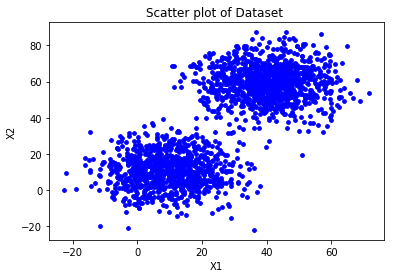

In [31]:
data1 = pd.read_csv('dataset.csv')
X = data1['V1'].values
#print(X.size)
Y = data1['V2'].values
labels = ([1] * 100) + ([2] * 1000)
data = {'x': X, 'y': Y,'label':labels}
df = pd.DataFrame(data=data)
plt.scatter(data['x'], data['y'], 14,c='blue')
plt.title('Scatter plot of Dataset ')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

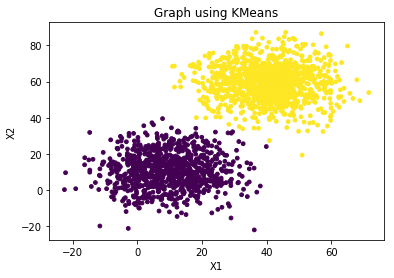

In [32]:
kmeans = KMeans(2, random_state=0)
labels = kmeans.fit(data1).predict(data1)
plt.scatter(data['x'], data['y'], 14,c=labels, cmap='viridis')
plt.title('Graph using KMeans')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()


/home/sravs/.local/lib/python3.5/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
/home/sravs/.local/lib/python3.5/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/sravs/.local/lib/python3.5/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/sravs/.local/lib/python3.5/site-packages/sklearn/utils/deprecation.py:77: Depreca

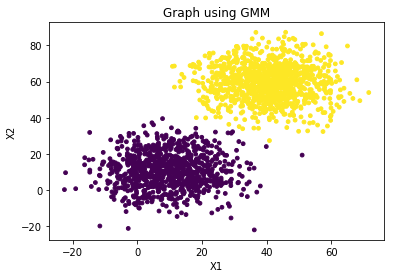

In [33]:
gmm = GMM(n_components = 2).fit(data1)
labels = gmm.predict(data1)
plt.scatter(data['x'], data['y'], 14,c=labels, cmap='viridis')
plt.title('Graph using GMM')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

Since GMM is a probabilistic function, we consider the probabilities of each point being in either of the clusters. In order to find this, we use the 'predict_proba' method.This gives the probability measure. 

In [34]:
probs = gmm.predict_proba(data1)
#print(probs[990:1110].round(2)) #This can be done to see the probability measure of each point. 

/home/sravs/.local/lib/python3.5/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)


This uncertainity can be viewed by taking different size of the points depending on the probability measure. If the probability of a particular point being in a given cluster is more, then the size of that point is more. 

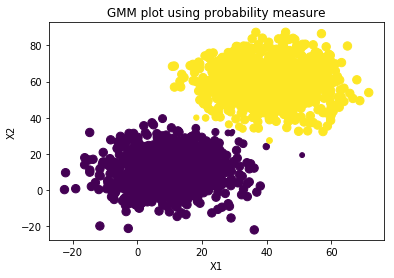

In [35]:
size = 70*probs.max(1)**2
plt.scatter(data['x'], data['y'], s=size,c=labels, cmap='viridis')
plt.title('GMM plot using probability measure')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

The clusters are visualised along with the ellipse. 

In [36]:
def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(data['x'], data['y'], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(data['x'], data['y'], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covars_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

/home/sravs/.local/lib/python3.5/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
/home/sravs/.local/lib/python3.5/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/sravs/.local/lib/python3.5/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/sravs/.local/lib/python3.5/site-packages/sklearn/utils/deprecation.py:77: Depreca

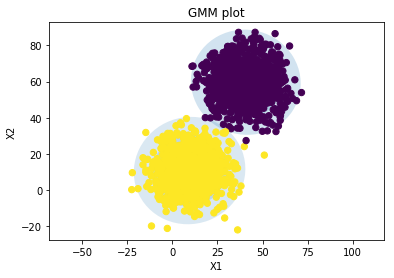

In [37]:
gmm = GMM(n_components=2, covariance_type='full', random_state=42)
plot_gmm(gmm,data1)
plt.title('GMM plot')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()